#MOVIE SUGGESTIONS FROM ROTTEN TOMATOES

In [26]:
import sqlite3
import movie_db as mdb
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

##DataBase and Tables

###     www.rottentomatoes.com ->
###-> (beautifulsoup + regular expression)-> SQLite ->
###-> (nltb) -> Data Analysis

In [27]:
movie_list = mdb.getReview("select * from movie_title")
#movie_list["Review"] = [0]*len(movie_list)
review = []
for movie in movie_list.Title:
    review += [mdb.getReview("select count(*) from %s" %movie).iat[0,0]]
movie_list["Review"] = review
movie_list

,Title,Ranking,Review
0,inception,High,1028
1,interstellar_2014,High,1029
2,mad_max_fury_road,High,1028
3,wall_e,High,1027
4,pk,High,175
5,eternal_sunshine_of_the_spotless_mind,High,1032
6,its_such_a_beautiful_day,High,89
7,guardians_of_the_galaxy,High,1019
8,donnie_darko,High,1034
9,x_men_days_of_future_past,High,1023


##Review Count

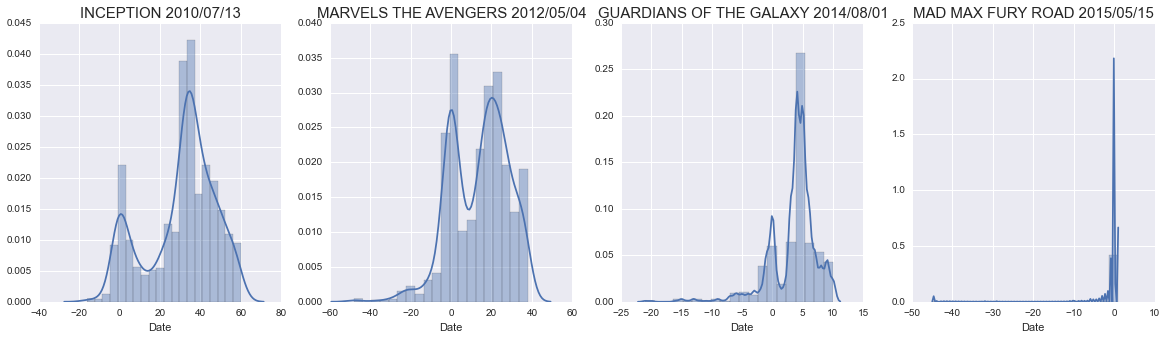

In [28]:
import review_analysis as ra
plt.rcParams['figure.figsize'] = 20, 5
movie_id = ["inception","marvels_the_avengers","guardians_of_the_galaxy","mad_max_fury_road",\
            "interstellar_2014","wall_e","jurassic_world"]
release_date = ["2010/07/13","2012/05/04","2014/08/01","2015/05/15","2014/11/05","2008/06/27","2015/06/12"]
for i in range(4):
    rating = mdb.getReview("select Date, Rating from %s order by Date" %movie_id[i])
    release = datetime.strptime(release_date[i], "%Y/%m/%d")
    rating["Date"] = ra.timeDiff(rating["Date"], release, interval = 30)
    plt.subplot(int("14%d" %(i+1)))
    ra.plotDateHist(rating["Date"], "%s %s" %(movie_id[i], release_date[i]))

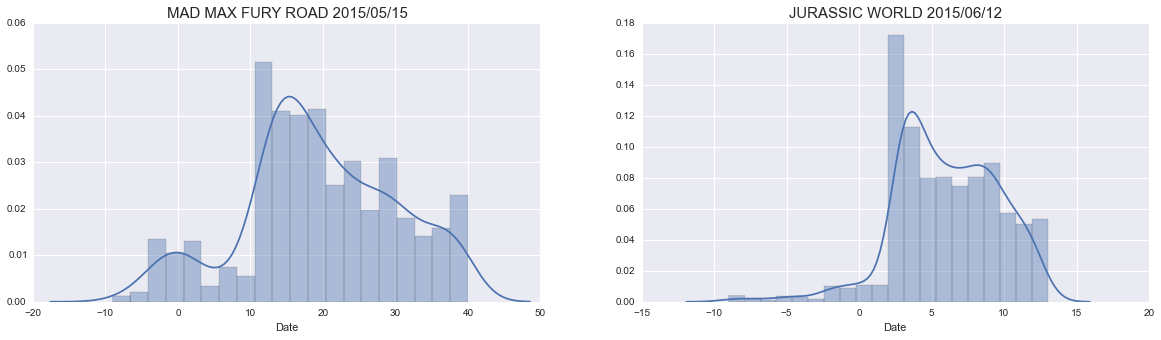

In [29]:
j = 121
for i in [3,6]:
    rating = mdb.getReview("select Date, Rating from %s order by Date" %movie_id[i])
    release = datetime.strptime(release_date[i], "%Y/%m/%d")
    rating["Date"] = ra.timeDiff(rating["Date"], release, interval = 1)
    plt.subplot(j)
    j += 1
    ra.plotDateHist(rating["Date"][rating.Date > -10], "%s %s" %(movie_id[i], release_date[i]))

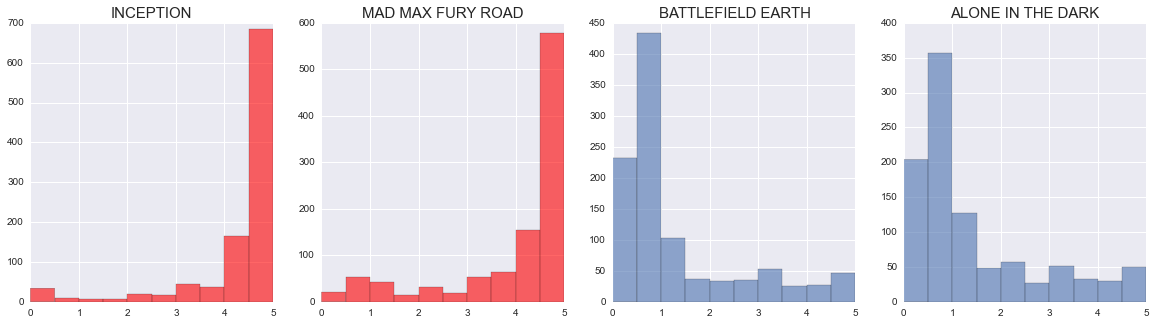

In [30]:
movies = ["inception","mad_max_fury_road","battlefield_earth","alone_in_the_dark"]
rating = mdb.getReview("select Rating from %s order by Date" %movies[0])
plt.subplot(141)
plt.hist(rating.Rating, color = "red", alpha = .6)
plt.title(movies[0].upper().replace("_", " "), fontsize = 15)
rating = mdb.getReview("select Rating from %s order by Date" %movies[1])
plt.subplot(142)
plt.hist(rating.Rating, color = "red", alpha = .6)
plt.title(movies[1].upper().replace("_", " "), fontsize = 15)
    
rating = mdb.getReview("select Rating from %s order by Date" %movies[2])
plt.subplot(143)
plt.hist(rating.Rating, alpha = .6)
plt.title(movies[2].upper().replace("_", " "), fontsize = 15)
rating = mdb.getReview("select Rating from %s order by Date" %movies[3])
plt.subplot(144)
plt.hist(rating.Rating, alpha = .6)
plt.title(movies[3].upper().replace("_", " "), fontsize = 15)

##Natural Language Analysis

In [25]:
import nltk_analysis as nla

In [41]:
movie_a = ["inception","interstellar_2014","mad_max_fury_road","wall_e","pk",\
    "eternal_sunshine_of_the_spotless_mind","its_such_a_beautiful_day",\
    "guardians_of_the_galaxy","donnie_darko","x_men_days_of_future_past",\
    "marvels_the_avengers","evangerionshingekijobanha","jurassic_world",\
    "the_disappearance_of_haruhi_suzumiya"]

movie_b = ["jurassic_shark_2013","aliens_vs_avatars","age_of_ice",\
    "zombie_massacre","alone_in_the_dark","battlefield_earth","super_shark",\
    "airplane_vs_volcano","alien_abduction","r500_mph_storm","entourage"]

In [108]:
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_5 = nla.NLAnalysis(text_b)

In [130]:
text_a = []
for movie in movie_a:
    query = "select Comment from %s where Rating = 5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_a = text_a + [text]
text_a = " ".join(text_list_a)
nl_a_5 = nla.NLAnalysis(text_a)
text_a = []
for movie in movie_a:
    query = "select Comment from %s where Rating = 4.5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_a = text_a + [text]
text_a = " ".join(text_list_a)
nl_a_45 = nla.NLAnalysis(text_a)
text_a = []
for movie in movie_a:
    query = "select Comment from %s where Rating = 4" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_a = text_a + [text]
text_a = " ".join(text_list_a)
nl_a_4 = nla.NLAnalysis(text_a)
text_a = []
for movie in movie_a:
    query = "select Comment from %s where Rating = 3.5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_a = text_a + [text]
text_a = " ".join(text_list_a)
nl_a_35 = nla.NLAnalysis(text_a)
text_a = []
for movie in movie_a:
    query = "select Comment from %s where Rating = 3" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_a = text_a + [text]
text_a = " ".join(text_list_a)
nl_a_3 = nla.NLAnalysis(text_a)


In [138]:
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_5 = nla.NLAnalysis(text_b)
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 4.5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_45 = nla.NLAnalysis(text_b)
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 4" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_4 = nla.NLAnalysis(text_b)
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 3.5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_35 = nla.NLAnalysis(text_b)
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 3" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_3 = nla.NLAnalysis(text_b)
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 2.5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_25 = nla.NLAnalysis(text_b)
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 2" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_2 = nla.NLAnalysis(text_b)
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 1.5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_15 = nla.NLAnalysis(text_b)
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 1" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_1 = nla.NLAnalysis(text_b)
text_b = []
for movie in movie_b:
    query = "select Comment from %s where Rating = 0.5" %movie
    comments = mdb.getReview(query)
    text = " ".join(comments["Comment"])
    text_list_b = text_b + [text]
text_b = " ".join(text_list_b)
nl_b_05 = nla.NLAnalysis(text_b)

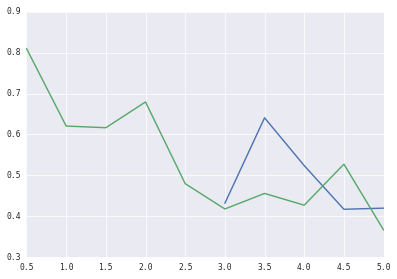

In [141]:
plt.plot([3,3.5,4,4.5,5],[nl_a_3.richness_clean,nl_a_35.richness_clean,nl_a_4.richness_clean,nl_a_45.richness_clean,nl_a_5.richness_clean])
plt.plot([.5,1,1.5,2,2.5,3,3.5,4,4.5,5],[nl_b_05.richness_clean,nl_b_1.richness_clean,nl_b_15.richness_clean,nl_b_2.richness_clean,nl_b_25.richness_clean,nl_b_3.richness_clean,nl_b_35.richness_clean,nl_b_4.richness_clean,nl_b_45.richness_clean,nl_b_5.richness_clean])

## Future work -- Bigram Collocations